In [7]:
# Import packages
import cv2
import numpy as np
import matplotlib.pyplot as plt

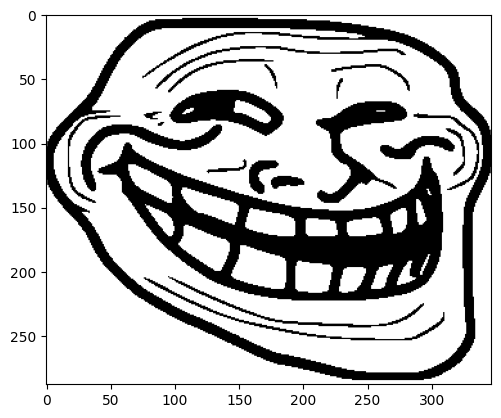

In [141]:
# Load image
img = cv2.imread("trollface.png")

# Set mode to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Set threshold
gray[gray < 128] = 0
gray[gray >= 128] = 255

# Show image
plt.imshow(gray, cmap="gray")
plt.show()

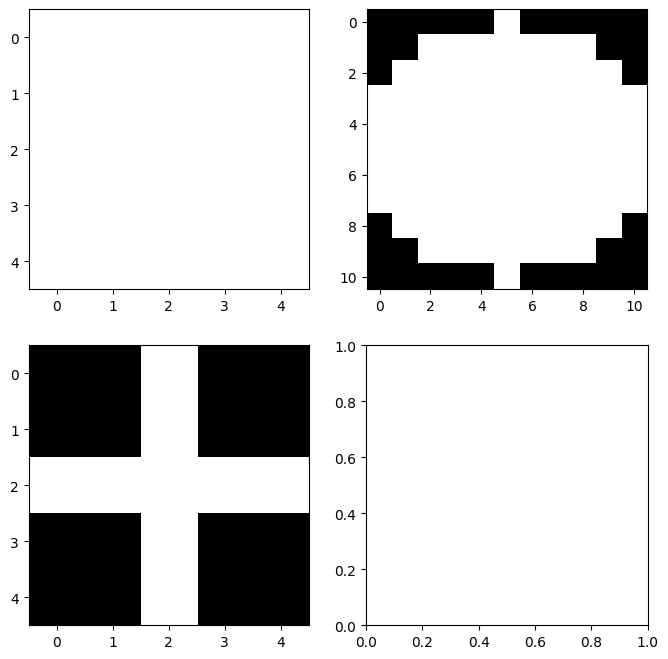

In [143]:
# Generate kernels
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

ax, fig = plt.subplots(2, 2, figsize=(8, 8))
fig[0, 0].imshow(kernel1, cmap="gray_r")
fig[0, 1].imshow(kernel2, cmap="gray")
fig[1, 0].imshow(kernel3, cmap="gray")
plt.show()

In [137]:
# Define hit_or_miss function

def add_border(img: np.ndarray, width: int = 1):
    img = np.pad(img, width, mode="constant", constant_values=255)
    return img

def hit_or_miss(img: np.ndarray, kernel: np.ndarray):
    kh, kw = kernel.shape
    img = add_border(img, kh // 2)
    output = np.zeros_like(img)

    # Invert image
    img = 255 - img
    
    kernel = kernel * 255
    for i in range(img.shape[0] - kw):
        for j in range(img.shape[1] - kh):
            # check if all kernel positions with value 255 are also 255 in the image
            if np.all([img[i + x, j + y] == 255 if kernel[x, y] == 255 else True for x in range(kw) for y in range(kh)]):
                output[i, j] = 128
            else:
                output[i, j] = 0
    output = output[kh // 2:-kh // 2, kw // 2:-kw // 2]
    return output

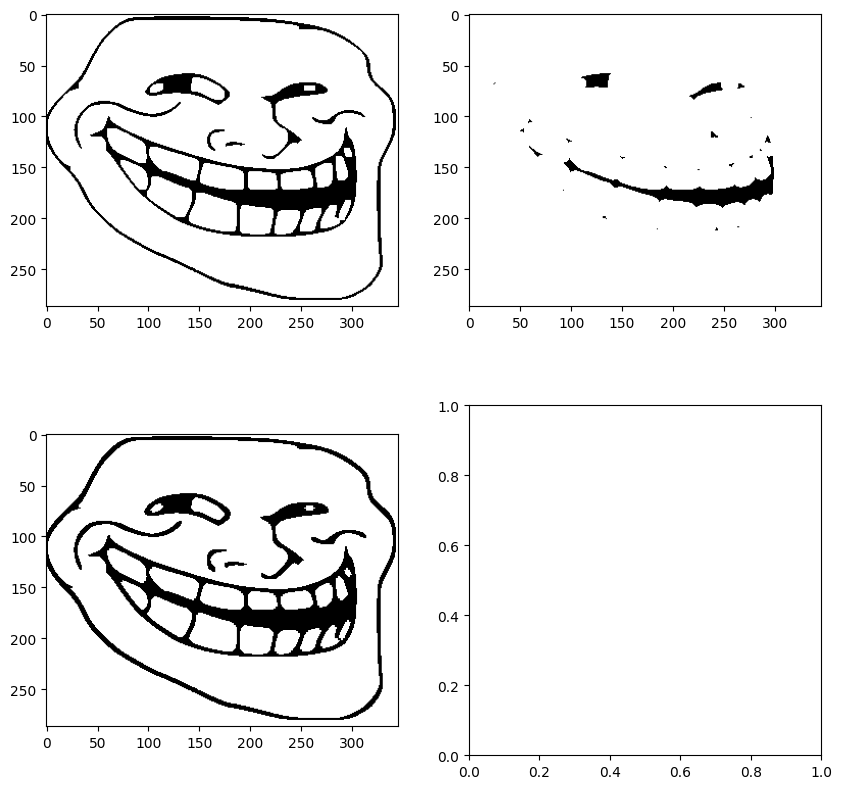

In [144]:
# Apply hit or miss

img1 = hit_or_miss(gray, kernel1)
img2 = hit_or_miss(gray, kernel2)
img3 = hit_or_miss(gray, kernel3)

ax, fig = plt.subplots(2, 2, figsize=(10, 10))
fig[0, 0].imshow(img1, cmap="gray_r")
fig[0, 1].imshow(img2, cmap="gray_r")
fig[1, 0].imshow(img3, cmap="gray_r")
plt.show()